<a href="https://colab.research.google.com/github/KillerStrike17/DeepLearning_for_NLP/blob/master/Recurrent_Neural_Networks_101/SimpleRNN_Over_Reuters_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [0]:
# Importing the Gods

import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.datasets import reuters
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense


## Load Dataset

In [0]:
# Paramters for Embedding Layer 

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

In [0]:
#Creating the Dataset
print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
2113536/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [0]:
#encoding the test Labels
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [0]:
y_test.shape

(2246, 46)

## Test 1

With Same new Batchsize

In [0]:

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
_____________________________________________

In [0]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6287 samples, validate on 2695 samples
Epoch 1/10





6287/6287 [==============================] - 19s 3ms/step - loss: 2.9744 - acc: 0.2680 - val_loss: 2.3810 - val_acc: 0.3618
Epoch 2/10
6287/6287 [==============================] - 9s 1ms/step - loss: 2.2960 - acc: 0.4037 - val_loss: 2.3362 - val_acc: 0.3662
Epoch 3/10
6287/6287 [==============================] - 9s 1ms/step - loss: 2.0002 - acc: 0.4924 - val_loss: 2.4144 - val_acc: 0.3714
Epoch 4/10
6287/6287 [==============================] - 9s 1ms/step - loss: 1.6918 - acc: 0.5745 - val_loss: 2.4578 - val_acc: 0.3796
Epoch 5/10
6287/6287 [==============================] - 9s 1ms/step - loss: 1.3722 - acc: 0.6620 - val_loss: 2.6626 - val_acc: 0.3588
Epoch 6/10
6287/6287 [==============================] - 9s 1ms/step - loss: 1.0788 - acc: 0.7570 - val_loss: 2.7753 - val_acc: 0.3451
Epoch 7/10
6287/6287 [=======================

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
________________________________________________

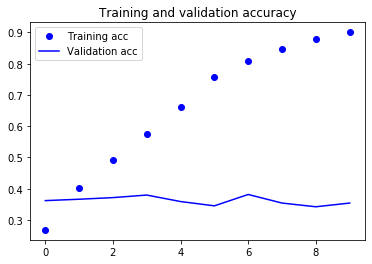

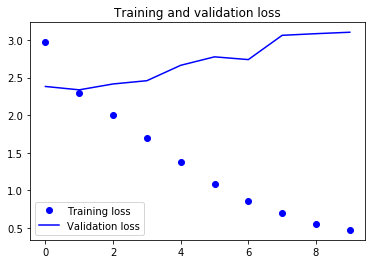

In [0]:

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test 2

With predefined Batchsize

In [0]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
________________________________________________

In [0]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 64s 10ms/step - loss: 2.6990 - acc: 0.3272 - val_loss: 2.5807 - val_acc: 0.3477
Epoch 2/10
6287/6287 [==============================] - 62s 10ms/step - loss: 2.2043 - acc: 0.4380 - val_loss: 2.2060 - val_acc: 0.4219
Epoch 3/10
6287/6287 [==============================] - 62s 10ms/step - loss: 1.9709 - acc: 0.5066 - val_loss: 2.4157 - val_acc: 0.3622
Epoch 4/10
6287/6287 [==============================] - 61s 10ms/step - loss: 1.6378 - acc: 0.5885 - val_loss: 2.4688 - val_acc: 0.3926
Epoch 5/10
6287/6287 [==============================] - 60s 10ms/step - loss: 1.2569 - acc: 0.6882 - val_loss: 2.5299 - val_acc: 0.4349
Epoch 6/10
6287/6287 [==============================] - 60s 10ms/step - loss: 0.9246 - acc: 0.7686 - val_loss: 2.9155 - val_acc: 0.3892
Epoch 7/10
6287/6287 [==============================] - 60s 10ms/step - loss: 0.6825 - acc: 0.8341 - val_loss: 2.9855 - val_acc: 0.3955


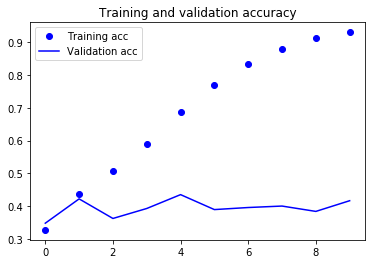

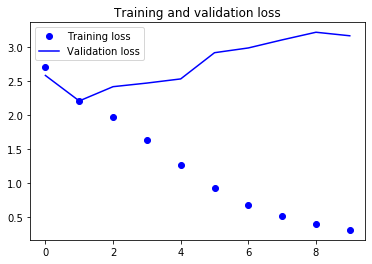

In [0]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()